In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Documents/income.csv")
df.head()

,Name,Age,Income
0,a,22,7000
1,s,33,9000
2,d,44,16000
3,f,45,32000
4,g,12,12000


Text(0, 0.5, 'Income')

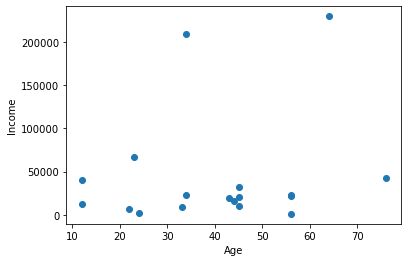

In [5]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [7]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2])

In [8]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,a,22,7000,0
1,s,33,9000,0
2,d,44,16000,0
3,f,45,32000,2
4,g,12,12000,0


In [9]:
km.cluster_centers_

array([[3.91666667e+01, 1.38416667e+04],
       [4.90000000e+01, 2.20000000e+05],
       [3.90000000e+01, 4.55000000e+04]])

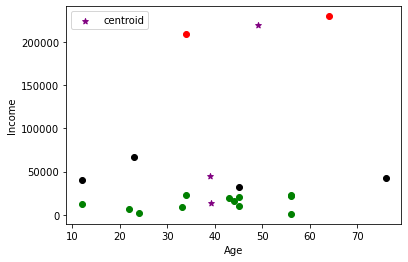

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [13]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [14]:
df.head()

,Name,Age,Income,cluster
0,a,0.156250,0.026201,0
1,s,0.328125,0.034934,0
2,d,0.500000,0.065502,0
3,f,0.515625,0.135371,2
4,g,0.000000,0.048035,0


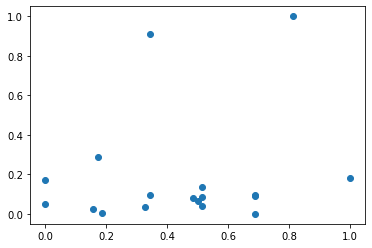

In [15]:
plt.scatter(df.Age,df['Income'])

In [17]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [18]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income,cluster
0,a,0.156250,0.026201,0
1,s,0.328125,0.034934,0
2,d,0.500000,0.065502,1
3,f,0.515625,0.135371,1
4,g,0.000000,0.048035,0


In [19]:
km.cluster_centers_

array([[0.16964286, 0.09550842],
       [0.62152778, 0.08685104],
       [0.578125  , 0.95633188]])

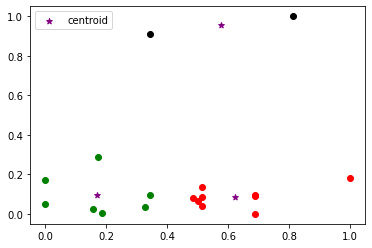

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [23]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


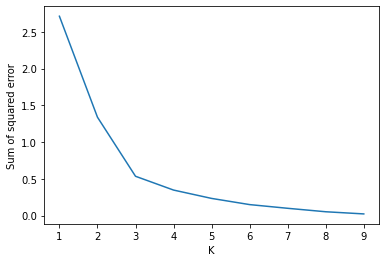

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)